<a href="https://colab.research.google.com/github/MaferVelde/Telecom-X/blob/main/Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción

Realizaremos un análisis a fondo de los datos que tenemos en base a nuestros clientes para entender el motivo por el cual de se llega a la deserción. Para eso compararemos las diferentes variables para encontrar la relación de ellas con la deserción de clientes.

# Importar bibliotecas y datos

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Primero exportamos el archivo 'json' a nuestro colab para poder extraer los datos y lo transformamos a Data Frame.

In [170]:
datos = pd.read_json('/content/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [171]:
df = pd.DataFrame(datos)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Extracción y transformación de datos

Extraemos y normalizamos los datos de nuestra tabla, revisamos el typo de dato y al final los unimos en una sola tabla.

In [172]:
df_1 = pd.json_normalize(df['customer'])
df_1

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [173]:
df_1['gender'] = df_1['gender'].astype('category')
df_1['Partner'] = df_1['Partner'].astype('category')
df_1['Dependents'] = df_1['Dependents'].astype('category')


In [174]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         7267 non-null   category
 1   SeniorCitizen  7267 non-null   int64   
 2   Partner        7267 non-null   category
 3   Dependents     7267 non-null   category
 4   tenure         7267 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 135.3 KB


In [175]:
df_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [176]:
df_2 = pd.json_normalize(df['phone'])
df_2

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [177]:
df_2['MultipleLines'] = df_2['MultipleLines'].astype('category')
df_2['PhoneService'] = df_2['PhoneService'].astype('category')

In [178]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PhoneService   7267 non-null   category
 1   MultipleLines  7267 non-null   category
dtypes: category(2)
memory usage: 14.6 KB


In [179]:
df_2.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [180]:
df_3 = pd.json_normalize(df['internet'])
df_3

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [181]:
df_3['OnlineSecurity'] = df_3['OnlineSecurity'].astype('category')
df_3['OnlineBackup'] = df_3['OnlineBackup'].astype('category')
df_3['DeviceProtection'] = df_3['DeviceProtection'].astype('category')
df_3['TechSupport'] = df_3['TechSupport'].astype('category')
df_3['StreamingTV'] = df_3['StreamingTV'].astype('category')
df_3['StreamingMovies'] = df_3['StreamingMovies'].astype('category')

In [182]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   InternetService   7267 non-null   object  
 1   OnlineSecurity    7267 non-null   category
 2   OnlineBackup      7267 non-null   category
 3   DeviceProtection  7267 non-null   category
 4   TechSupport       7267 non-null   category
 5   StreamingTV       7267 non-null   category
 6   StreamingMovies   7267 non-null   category
dtypes: category(6), object(1)
memory usage: 100.3+ KB


In [183]:
df_3.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [184]:
df_4 = pd.json_normalize(df['account'])
df_4

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [185]:
df_4['PaperlessBilling'] = df_4['PaperlessBilling'].astype('category')
df_4['Charges.Monthly'] = df_4['Charges.Monthly'].astype('float64')

In [186]:
df_4['Charges.Total'] = df_4['Charges.Total'].replace(' ', np.nan)
df_4['Charges.Total'] = df_4['Charges.Total'].astype('float64')

In [187]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Contract          7267 non-null   object  
 1   PaperlessBilling  7267 non-null   category
 2   PaymentMethod     7267 non-null   object  
 3   Charges.Monthly   7267 non-null   float64 
 4   Charges.Total     7256 non-null   float64 
dtypes: category(1), float64(2), object(2)
memory usage: 234.4+ KB


In [188]:
df_4.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.30
1,Month-to-month,No,Mailed check,59.9,542.40
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.40


In [189]:
df_5 = df.drop(columns=['customer', 'phone', 'internet', 'account'])
df_5

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


In [190]:
datos_compuestos = pd.merge(df_1, df_2, left_index=True, right_index=True)
datos_compuestos

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines
0,Female,0,Yes,Yes,9,Yes,No
1,Male,0,No,No,9,Yes,Yes
2,Male,0,No,No,4,Yes,No
3,Male,1,Yes,No,13,Yes,No
4,Female,1,Yes,No,3,Yes,No
...,...,...,...,...,...,...,...
7262,Female,0,No,No,13,Yes,No
7263,Male,0,Yes,No,22,Yes,Yes
7264,Male,0,No,No,2,Yes,No
7265,Male,0,Yes,Yes,67,Yes,No


In [191]:
datos_compuestos_2 = pd.merge(datos_compuestos, df_3, left_index=True, right_index=True)
datos_compuestos_2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No
7263,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes
7264,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No
7265,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes


In [192]:
datos_compuestos_3 = pd.merge(datos_compuestos_2, df_4, left_index=True, right_index=True)
datos_compuestos_3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [193]:
datos_compuestos_4 = pd.merge(df_5, datos_compuestos_3, left_index=True, right_index=True)
datos_compuestos_4

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# Columna de cuentas diarias

Calculamos los cargos diarios y los agregamos a la tabla.

In [194]:
cuentas_diarias = (datos_compuestos_3['Charges.Monthly']/30)
cuentas_diarias

,Charges.Monthly
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [195]:
cuentas_diarias.rename('Cargo diario', inplace=True)
cuentas_diarias

,Cargo diario
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [196]:
cuentas_diarias.describe()

,Cargo diario
count,7267.000000
mean,2.157337
std,1.004319
min,0.608333
25%,1.180833
50%,2.343333
75%,2.995833
max,3.958333


# Estandarización y transformación de datos

A continuación realizamos la estandarización y transformación de los datos. Esto incluye el cambiar los nombres de las columnas de 'inglés' a 'español', y transformamos los valores de las columnas con respuesta 'Si' o 'No' a código binario, Si = 1 y No = 0, para que así sea más fácil el tratamiento de los datos.
De igual manera, revisamos si hay valores nulos para eliminarlos de los datos para evitar errores.

In [197]:
datos_completos = datos_compuestos_4.copy()
datos_completos.insert(loc=19, column='Cargo diario', value=cuentas_diarias)
datos_completos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cargo diario,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.186667,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,1.996667,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.463333,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.266667,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.796667,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.838333,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.836667,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.676667,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.261667,67.85,4627.65


In [198]:
lista= datos_completos.columns.to_list()
lista

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Cargo diario',
 'Charges.Monthly',
 'Charges.Total']

In [199]:
columnas_español = ['ID de cliente','Deserción','Genero','Adulto Mayor','Pareja','Dependientes','Antigüedad','Servicio telefónico','Lineas multiples','Servicio de internet','Seguridad online','Respaldo online','Protección de dispositivo','Soporte técnico','TV streaming','Streaming de películas','Contrato','Facturación sin papel','Metodo de Pago','Cargo diario','Cargo mensual','Cargo total']


In [200]:
mapping = dict(zip(lista, columnas_español))
datos_completos = datos_completos.rename(columns=mapping)
datos_completos

,ID de cliente,Deserción,Genero,Adulto Mayor,Pareja,Dependientes,Antigüedad,Servicio telefónico,Lineas multiples,Servicio de internet,...,Protección de dispositivo,Soporte técnico,TV streaming,Streaming de películas,Contrato,Facturación sin papel,Metodo de Pago,Cargo diario,Cargo mensual,Cargo total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.186667,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,1.996667,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.463333,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.266667,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.796667,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.838333,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.836667,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.676667,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.261667,67.85,4627.65


In [201]:
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ID de cliente              7267 non-null   object  
 1   Deserción                  7267 non-null   object  
 2   Genero                     7267 non-null   category
 3   Adulto Mayor               7267 non-null   int64   
 4   Pareja                     7267 non-null   category
 5   Dependientes               7267 non-null   category
 6   Antigüedad                 7267 non-null   int64   
 7   Servicio telefónico        7267 non-null   category
 8   Lineas multiples           7267 non-null   category
 9   Servicio de internet       7267 non-null   object  
 10  Seguridad online           7267 non-null   category
 11  Respaldo online            7267 non-null   category
 12  Protección de dispositivo  7267 non-null   category
 13  Soporte técnico            7267 n

In [202]:
columnas_vacias = [
    col for col in datos_completos.columns
    if datos_completos[col].astype(str).str.strip().eq('').any()
]
print("Columnas vacías:", columnas_vacias)

Columnas vacías: ['Deserción']


In [203]:
datos_completos = datos_completos.replace(r'^\s*$', np.nan, regex=True)

In [204]:
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ID de cliente              7267 non-null   object  
 1   Deserción                  7043 non-null   object  
 2   Genero                     7267 non-null   category
 3   Adulto Mayor               7267 non-null   int64   
 4   Pareja                     7267 non-null   category
 5   Dependientes               7267 non-null   category
 6   Antigüedad                 7267 non-null   int64   
 7   Servicio telefónico        7267 non-null   category
 8   Lineas multiples           7267 non-null   category
 9   Servicio de internet       7267 non-null   object  
 10  Seguridad online           7267 non-null   category
 11  Respaldo online            7267 non-null   category
 12  Protección de dispositivo  7267 non-null   category
 13  Soporte técnico            7267 n

In [205]:
datos_completos['Cargo total'] = pd.to_numeric(datos_completos['Cargo total'], errors='coerce')

In [206]:
columnas_nulas = datos_completos.columns[datos_completos.isnull().any()].tolist()
print("Columnas nulas:", columnas_nulas)

Columnas nulas: ['Deserción', 'Cargo total']


In [207]:
for col in columnas_nulas:
    nulos = datos_completos[col].isnull().sum()
    porcentaje = datos_completos[col].isnull().mean() * 100

    print(f"Columna: {col}")
    print(f" - Cantidad de nulos: {nulos:,}")
    print(f" - Porcentaje: {porcentaje:.4f}%\n")

Columna: Deserción
 - Cantidad de nulos: 224
 - Porcentaje: 3.0824%

Columna: Cargo total
 - Cantidad de nulos: 11
 - Porcentaje: 0.1514%



In [208]:
datos_completos = datos_completos.dropna(subset=[ 'Deserción', 'Cargo total'])
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ID de cliente              7032 non-null   object  
 1   Deserción                  7032 non-null   object  
 2   Genero                     7032 non-null   category
 3   Adulto Mayor               7032 non-null   int64   
 4   Pareja                     7032 non-null   category
 5   Dependientes               7032 non-null   category
 6   Antigüedad                 7032 non-null   int64   
 7   Servicio telefónico        7032 non-null   category
 8   Lineas multiples           7032 non-null   category
 9   Servicio de internet       7032 non-null   object  
 10  Seguridad online           7032 non-null   category
 11  Respaldo online            7032 non-null   category
 12  Protección de dispositivo  7032 non-null   category
 13  Soporte técnico            7032 non-nu

In [209]:
lista = datos_completos.select_dtypes(include='object').columns

for col in lista:
    print(f"\n Columna: {col}")
    print(datos_completos[col].value_counts())


 Columna: ID de cliente
ID de cliente
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7032, dtype: int64

 Columna: Deserción
Deserción
No     5163
Yes    1869
Name: count, dtype: int64

 Columna: Servicio de internet
Servicio de internet
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

 Columna: Contrato
Contrato
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

 Columna: Metodo de Pago
Metodo de Pago
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


In [210]:
lista = datos_completos.select_dtypes(include='category').columns

for col in lista:
    print(f"\n Columna: {col}")
    print(datos_completos[col].value_counts())


 Columna: Genero
Genero
Male      3549
Female    3483
Name: count, dtype: int64

 Columna: Pareja
Pareja
No     3639
Yes    3393
Name: count, dtype: int64

 Columna: Dependientes
Dependientes
No     4933
Yes    2099
Name: count, dtype: int64

 Columna: Servicio telefónico
Servicio telefónico
Yes    6352
No      680
Name: count, dtype: int64

 Columna: Lineas multiples
Lineas multiples
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

 Columna: Seguridad online
Seguridad online
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

 Columna: Respaldo online
Respaldo online
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

 Columna: Protección de dispositivo
Protección de dispositivo
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

 Columna: Soporte técnico
So

In [211]:
tipo_texto = ['Metodo de Pago', 'Genero', 'Contrato',
              'Pareja', 'Deserción', 'Dependientes',
              'Servicio telefónico', 'Facturación sin papel']

datos_completos[tipo_texto] = datos_completos[tipo_texto].apply(
    lambda col: col.astype(str).str.strip()
)

traduccion_col = {
    'Metodo de Pago': {
        'Electronic check': 'Cheque Electrónico',
        'Mailed check': 'Cheque por Correo',
        'Bank transfer (automatic)': 'Transferencia Bancaria (Automatico)',
        'Credit card (automatic)': 'Tarjeta de Crédito (Automatico)'
    },
    'Genero': {
        'Male': 'Masculino',
        'Female': 'Femenino'
    },
    'Contrato': {
        'Month-to-month': 'Mensual',
        'Two year': '2 Años',
        'One year': '1 Año'
    }
}

for col, mapa in traduccion_col.items():
    datos_completos[col] = datos_completos[col].replace(mapa)

In [212]:
datos_completos.head()

,ID de cliente,Deserción,Genero,Adulto Mayor,Pareja,Dependientes,Antigüedad,Servicio telefónico,Lineas multiples,Servicio de internet,...,Protección de dispositivo,Soporte técnico,TV streaming,Streaming de películas,Contrato,Facturación sin papel,Metodo de Pago,Cargo diario,Cargo mensual,Cargo total
0,0002-ORFBO,No,Femenino,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,1 Año,Yes,Cheque por Correo,2.186667,65.6,593.30
1,0003-MKNFE,No,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Mensual,No,Cheque por Correo,1.996667,59.9,542.40
2,0004-TLHLJ,Yes,Masculino,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Mensual,Yes,Cheque Electrónico,2.463333,73.9,280.85
3,0011-IGKFF,Yes,Masculino,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Mensual,Yes,Cheque Electrónico,3.266667,98.0,1237.85
4,0013-EXCHZ,Yes,Femenino,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Mensual,Yes,Cheque por Correo,2.796667,83.9,267.40


In [213]:
cod_binario = {'No': 0, 'Si': 1, 'Yes': 1}

col_binarias = [
    'Pareja', 'Deserción', 'Dependientes',
    'Servicio telefónico', 'Lineas multiples', 'Protección de dispositivo', 'Soporte técnico',
    'TV streaming', 'Streaming de películas','Facturación sin papel'
]

datos_completos[col_binarias] = (
    datos_completos[col_binarias]
        .replace(cod_binario)
        .infer_objects(copy=False)
)

df.head(2)

/tmp/ipython-input-1192491872.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(cod_binario)
/tmp/ipython-input-1192491872.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .replace(cod_binario)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [214]:
datos_completos

,ID de cliente,Deserción,Genero,Adulto Mayor,Pareja,Dependientes,Antigüedad,Servicio telefónico,Lineas multiples,Servicio de internet,...,Protección de dispositivo,Soporte técnico,TV streaming,Streaming de películas,Contrato,Facturación sin papel,Metodo de Pago,Cargo diario,Cargo mensual,Cargo total
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,1 Año,1,Cheque por Correo,2.186667,65.60,593.30
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Cheque por Correo,1.996667,59.90,542.40
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Mensual,1,Cheque Electrónico,2.463333,73.90,280.85
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Mensual,1,Cheque Electrónico,3.266667,98.00,1237.85
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Mensual,1,Cheque por Correo,2.796667,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Femenino,0,0,0,13,1,0,DSL,...,0,1,0,0,1 Año,0,Cheque por Correo,1.838333,55.15,742.90
7263,9992-RRAMN,1,Masculino,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Mensual,1,Cheque Electrónico,2.836667,85.10,1873.70
7264,9992-UJOEL,0,Masculino,0,0,0,2,1,0,DSL,...,0,0,0,0,Mensual,1,Cheque por Correo,1.676667,50.30,92.75
7265,9993-LHIEB,0,Masculino,0,1,1,67,1,0,DSL,...,1,1,0,1,2 Años,0,Cheque por Correo,2.261667,67.85,4627.65


# Análisis Descriptivo

Realizamos el análisis detallado de cada valor de nuestra tabla para tener una visión más amplia de toda la información.

In [215]:
datos_completos

,ID de cliente,Deserción,Genero,Adulto Mayor,Pareja,Dependientes,Antigüedad,Servicio telefónico,Lineas multiples,Servicio de internet,...,Protección de dispositivo,Soporte técnico,TV streaming,Streaming de películas,Contrato,Facturación sin papel,Metodo de Pago,Cargo diario,Cargo mensual,Cargo total
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,1 Año,1,Cheque por Correo,2.186667,65.60,593.30
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Cheque por Correo,1.996667,59.90,542.40
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Mensual,1,Cheque Electrónico,2.463333,73.90,280.85
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Mensual,1,Cheque Electrónico,3.266667,98.00,1237.85
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Mensual,1,Cheque por Correo,2.796667,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Femenino,0,0,0,13,1,0,DSL,...,0,1,0,0,1 Año,0,Cheque por Correo,1.838333,55.15,742.90
7263,9992-RRAMN,1,Masculino,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Mensual,1,Cheque Electrónico,2.836667,85.10,1873.70
7264,9992-UJOEL,0,Masculino,0,0,0,2,1,0,DSL,...,0,0,0,0,Mensual,1,Cheque por Correo,1.676667,50.30,92.75
7265,9993-LHIEB,0,Masculino,0,1,1,67,1,0,DSL,...,1,1,0,1,2 Años,0,Cheque por Correo,2.261667,67.85,4627.65


In [216]:
datos_completos.describe().T

,count,mean,std,min,25%,50%,75%,max
Deserción,7032.0,0.265785,0.441782,0.000000,0.00000,0.000,1.000000,1.000000
Adulto Mayor,7032.0,0.162400,0.368844,0.000000,0.00000,0.000,0.000000,1.000000
Pareja,7032.0,0.482509,0.499729,0.000000,0.00000,0.000,1.000000,1.000000
Dependientes,7032.0,0.298493,0.457629,0.000000,0.00000,0.000,1.000000,1.000000
Antigüedad,7032.0,32.421786,24.545260,1.000000,9.00000,29.000,55.000000,72.000000
Servicio telefónico,7032.0,0.903299,0.295571,0.000000,1.00000,1.000,1.000000,1.000000
Facturación sin papel,7032.0,0.592719,0.491363,0.000000,0.00000,1.000,1.000000,1.000000
Cargo diario,7032.0,2.159940,1.002866,0.608333,1.18625,2.345,2.995417,3.958333
Cargo mensual,7032.0,64.798208,30.085974,18.250000,35.58750,70.350,89.862500,118.750000
Cargo total,7032.0,2283.300441,2266.771362,18.800000,401.45000,1397.475,3794.737500,8684.800000


## Deserción de clientes

En esta sección analisaremos cual es el porcentaje de deserción de nuestros clientes.

In [217]:
desercion = datos_completos['Deserción'].value_counts()
porcentaje_desercion = datos_completos['Deserción'].value_counts(normalize=True) * 100
desercion


,count
Deserción,
0,5163
1,1869


In [218]:
porcentaje_desercion

,proportion
Deserción,
0,73.421502
1,26.578498


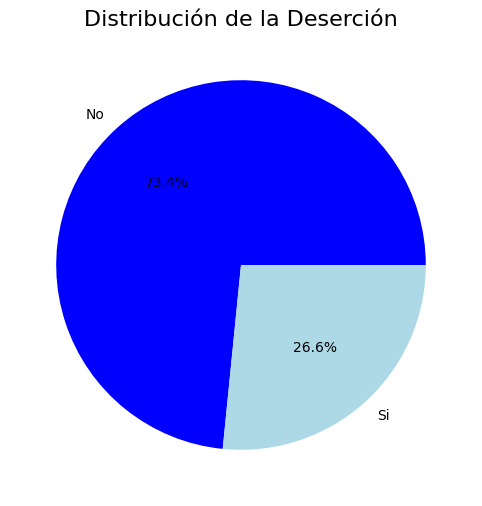

In [219]:

ax, fig = plt.subplots(figsize=(10, 6))
plt.title('Distribución de la Deserción', fontsize=16)
plt.pie(desercion, labels=('No','Si'), autopct='%1.1f%%', colors=['blue','lightblue'])
plt.xlabel('')
plt.ylabel('')
plt.show()

Podemos observar que en total la **deserción de clientes ha sido del 26.6%**, un total de **1869** clientes. Se considera un porcentaje alto ya que es más que una cuarta parte de ellos.

## Genero de los clientes

Analizamos si nuestros clientes en mayoría son de algún genero en específico.

In [220]:
Genero = datos_completos['Genero'].value_counts()
porcentaje_genero = datos_completos['Genero'].value_counts(normalize=True) * 100
Genero

,count
Genero,
Masculino,3549
Femenino,3483


In [221]:
porcentaje_genero

,proportion
Genero,
Masculino,50.469283
Femenino,49.530717


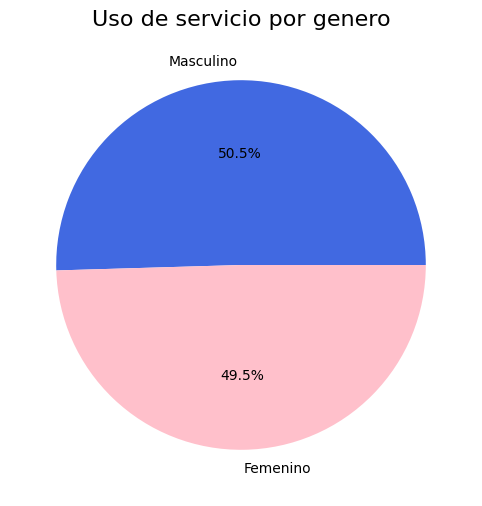

In [222]:
ax, fig = plt.subplots(figsize=(10, 6))
plt.title('Uso de servicio por genero', fontsize=16)
plt.pie(Genero, labels=('Masculino','Femenino'), autopct='%1.1f%%', colors=['royalblue','pink'])
plt.xlabel('')
plt.ylabel('')
plt.show()

En conclusión, **no hay un genero que sobresalga** entre nuestra clientela, ya que el genero masculino es el 50.5% y el femenino es del 49.5%, es una diferencia muy pequeña.

##Adultos mayores

Hacemos una comparación del grupo etario de nuestra clientela.

In [223]:
adulto_mayor = datos_completos['Adulto Mayor'].value_counts()
porcentaje_adulto_mayor = datos_completos['Adulto Mayor'].value_counts(normalize=True) * 100
adulto_mayor

,count
Adulto Mayor,
0,5890
1,1142


In [224]:
porcentaje_adulto_mayor

,proportion
Adulto Mayor,
0,83.759954
1,16.240046


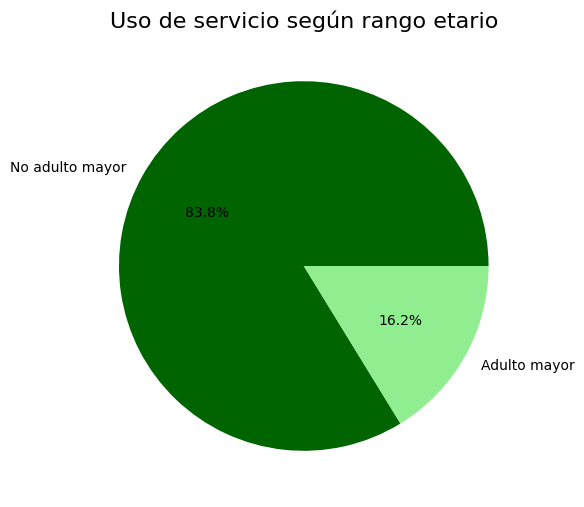

In [225]:
ax, fig = plt.subplots(figsize=(10, 6))
plt.title('Uso de servicio según rango etario', fontsize=16)
plt.pie(adulto_mayor, labels=('No adulto mayor','Adulto mayor'), autopct='%1.1f%%', colors=['darkgreen','lightgreen'])
plt.xlabel('')
plt.ylabel('')
plt.show()

LLegamos a la conclusión que nuestro rango de edad es menor, ya que los **adultos mayores son solamente el 16.2%** de los clientes.

##Clientes con pareja

Revisamos cual es la cantidad de clientes que cuentan con una pareja.

In [226]:
con_pareja = datos_completos['Pareja'].value_counts()
porcentaje_con_pareja = datos_completos['Pareja'].value_counts(normalize=True) * 100
con_pareja

,count
Pareja,
0,3639
1,3393


In [227]:
porcentaje_con_pareja

,proportion
Pareja,
0,51.749147
1,48.250853


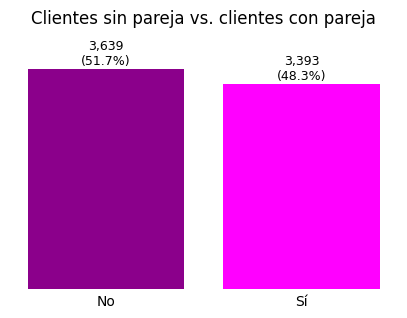

In [228]:
con_pareja.index = con_pareja.index.map({0: 'No', 1: 'Sí'})

colores = ['darkmagenta', 'magenta']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(con_pareja.index, con_pareja.values, color=colores)
ax.set_title('Clientes sin pareja vs. clientes con pareja', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(con_pareja.values, porcentaje_con_pareja.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

En general , son más los clientes sin pareja ,aunque la diferencia es poca, ya que los **clientes sin pareja son el 51.7%**, mientras que los que **tienen pareja son el 48.3%**.

##Clientes con dependientes de ellos

Revisamos si nuestros clientes cuentan con alguna persona dependiente de ellos.

In [229]:
depend = datos_completos['Dependientes'].value_counts()
porcentaje_depend = datos_completos['Dependientes'].value_counts(normalize=True) * 100
depend

,count
Dependientes,
0,4933
1,2099


In [230]:
porcentaje_depend

,proportion
Dependientes,
0,70.150739
1,29.849261


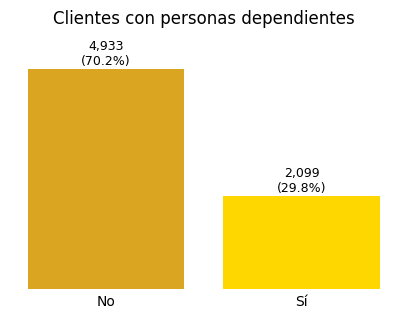

In [231]:
depend = datos_completos['Dependientes'].value_counts()
porcentaje_depend = datos_completos['Dependientes'].value_counts(normalize=True) * 100

depend.index = depend.index.map({0: 'No', 1: 'Sí'})

colores = ['goldenrod', 'gold']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(depend.index, depend.values, color=colores)
ax.set_title('Clientes con personas dependientes', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(depend.values, porcentaje_depend.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

La mayoría de nuestros clientes no cuentan con personas dependientes (**70.2%**).

##Antigüedad de los clientes

In [232]:
datos_completos['Antigüedad'].describe()

,Antigüedad
count,7032.000000
mean,32.421786
std,24.545260
min,1.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


Antigüedad de los Clientes (en meses):

* **Conteo (count):** Tenemos datos de 7032 clientes.
* **Media (mean):** La antigüedad promedio de los clientes es de aproximadamente 32.42 meses, lo que equivale a poco menos de 3 años.
* **Desviación Estándar (std):** La desviación estándar es de 24.55 meses, lo que indica una dispersión considerable en los datos de antigüedad. Hay clientes con muy poca antigüedad y otros con mucha.
* **Mínimo (min):** El cliente con menor antigüedad lleva 1 mes.
* **25 porciento (25%):** El 25% de nuestros clientes tiene una antigüedad de 9 meses o menos.
* **Mediana (50%):** La mitad de los clientes tiene una antigüedad de 29 meses (aproximadamente 2 años y 5 meses) o menos.
* **75 porciento (75%):** El 75% de los clientes tiene una antigüedad de 55 meses (aproximadamente 4 años y 7 meses) o menos.
* **Máximo (max):** El cliente con mayor antigüedad lleva 72 meses (6 años).

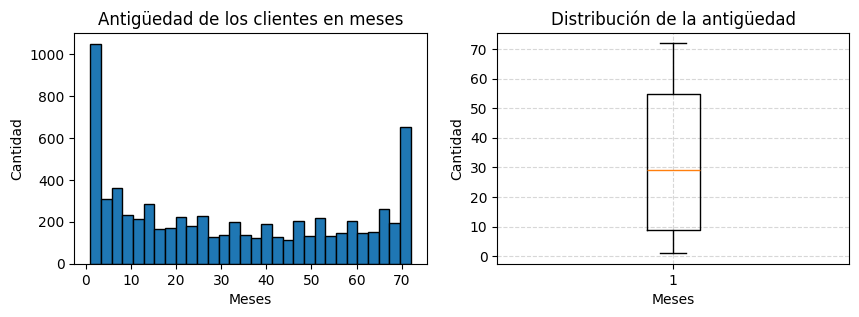

In [233]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(datos_completos['Antigüedad'], bins=30, edgecolor="black")
axs[0].set_title('Antigüedad de los clientes en meses')
axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Cantidad')

axs[1].boxplot(datos_completos['Antigüedad'])
axs[1].set_title('Distribución de la antigüedad')
axs[1].set_xlabel('Meses')
axs[1].set_ylabel('Cantidad')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

Este gráfico muestra la frecuencia de clientes para diferentes rangos de antigüedad. Se observa una distribución bimodal, con un pico significativo en los primeros meses (clientes nuevos) y otro pico hacia los 70-72 meses (clientes muy antiguos). Esto sugiere que tenemos una buena cantidad de clientes que acaban de empezar y un grupo leal de clientes a largo plazo, pero también indica que muchos clientes no superan la marca de los 60 meses.

Diagrama de Caja 'Distribución de la antigüedad': El diagrama de caja confirma esta distribución. La caja central (que representa el 50% de los datos) se extiende desde los 9 hasta los 55 meses. La línea en el medio de la caja (mediana) está en 29 meses. Los 'bigotes' se extienden hasta los valores mínimo y máximo, mostrando la amplia variabilidad. No se observan valores atípicos extremos, lo que indica que los datos están dentro de un rango esperado para la antigüedad de clientes, aunque con una distribución no uniforme.

##Servicio telefónico

Hacemos una revisión de nuestros clientes para saber si cuentan con servicio telefónico.

In [234]:
servicio_tel = datos_completos['Servicio telefónico'].value_counts()
porcentaje_servicio_tel = datos_completos['Servicio telefónico'].value_counts(normalize=True) * 100
servicio_tel

,count
Servicio telefónico,
1,6352
0,680


In [235]:
porcentaje_servicio_tel

,proportion
Servicio telefónico,
1,90.32992
0,9.67008


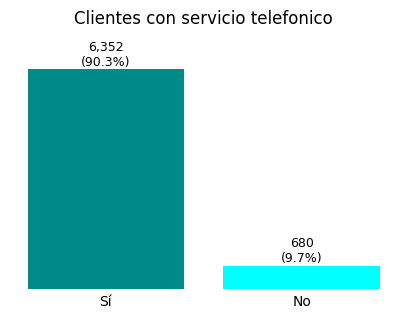

In [236]:
servicio_tel = datos_completos['Servicio telefónico'].value_counts()
porcentaje_servicio_tel = datos_completos['Servicio telefónico'].value_counts(normalize=True) * 100

servicio_tel = servicio_tel.rename(index={0: 'No', 1: 'Sí'})

colores = ['darkcyan', 'cyan']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(servicio_tel.index, servicio_tel.values, color=colores)
ax.set_title('Clientes con servicio telefonico', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(servicio_tel.values, porcentaje_servicio_tel.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

La gran mayoría de nuestros clientes cuentan **con servicio telefónico (90.3%)**, solo el 9.7% no cuentan con este servicio.

##Lineas múltiples

In [237]:
lineas = datos_completos['Lineas multiples'].value_counts()
porcentaje_lineas = datos_completos['Lineas multiples'].value_counts(normalize=True) * 100
lineas

,count
Lineas multiples,
0,3385
1,2967
No phone service,680


In [238]:
porcentaje_lineas

,proportion
Lineas multiples,
0,48.137088
1,42.192833
No phone service,9.670080


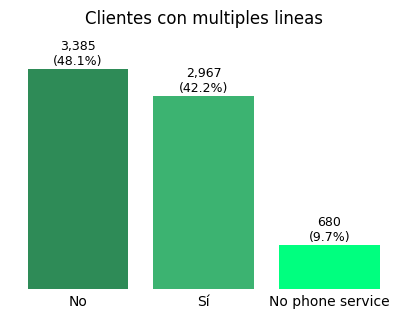

In [239]:
lineas = datos_completos['Lineas multiples'].value_counts()
porcentaje_lineas = datos_completos['Lineas multiples'].value_counts(normalize=True) * 100

lineas = lineas.rename(index={0: 'No', 1: 'Sí'})

# Colores
colores = ['seagreen', 'mediumseagreen','springgreen']

# Gráfico
fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0) # Quitamos los ticks del eje x

ax.bar(lineas.index, lineas.values, color=colores)
ax.set_title('Clientes con multiples lineas', pad=25)
ax.set_yticks([])

# Etiquetas
for i, (total, pct) in enumerate(zip(lineas.values, porcentaje_lineas.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

Al analisar nuestros clientes, al no tener servicio de telefono el 9.7% de ellos, tampoco cuentan con lineas multiples. Del resto de la clientela, el 48.1% si tienen servicion telefonico pero no cuentan con multiples lineas, y el 42.2% si cuentan con multiples lineas.

##Servicio de internet

In [240]:
servicio_internet = datos_completos['Servicio de internet'].value_counts()
porcentaje_servicio_internet = datos_completos['Servicio de internet'].value_counts(normalize=True) * 100
servicio_internet

,count
Servicio de internet,
Fiber optic,3096
DSL,2416
No,1520


In [241]:
porcentaje_servicio_internet

,proportion
Servicio de internet,
Fiber optic,44.027304
DSL,34.357224
No,21.615472


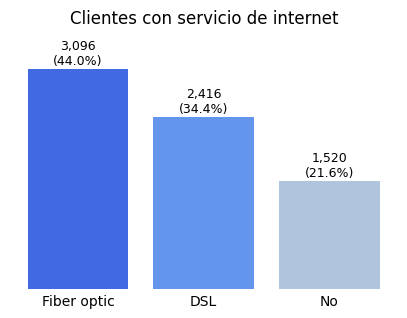

In [242]:
colores = ['royalblue', 'cornflowerblue','lightsteelblue']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(servicio_internet.index, servicio_internet.values, color=colores)
ax.set_title('Clientes con servicio de internet', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(servicio_internet.values, porcentaje_servicio_internet.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

Al analisar nuestros cliente, nos damos cuenta que el **21.6%** de ellos **no cuentan con servicio de internet**.

Del resto que si cuentan con servicio de internet, el **44% utilizan fibra óptica y el 34.4% utilizan DSL**.

##Protección de dispositivo

In [243]:
proteccion = datos_completos['Protección de dispositivo'].value_counts()
porcentaje_proteccion = datos_completos['Protección de dispositivo'].value_counts(normalize=True) * 100
proteccion

,count
Protección de dispositivo,
0,3094
1,2418
No internet service,1520


In [244]:
porcentaje_proteccion

,proportion
Protección de dispositivo,
0,43.998862
1,34.385666
No internet service,21.615472


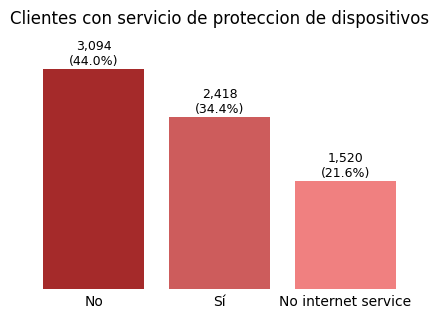

In [245]:
proteccion = proteccion.rename(index={0: 'No', 1: 'Sí'})

colores = ['brown', 'indianred','lightcoral']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0) # Quitamos los ticks del eje x

ax.bar(proteccion.index, proteccion.values, color=colores)
ax.set_title('Clientes con servicio de proteccion de dispositivos', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(proteccion.values, porcentaje_proteccion.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

El 21.6% de los clientes no cuentan con servicio de internet.

Si revisamos nuestros datos, podemos observar que la mayoría **(44%) no cuentan son el servicio de protección de dispositivo**, solo el 34.4% manejan ese servicio.

##Soporte técnico

In [246]:
soporte = datos_completos['Soporte técnico'].value_counts()
porcentaje_soporte = datos_completos['Soporte técnico'].value_counts(normalize=True) * 100
soporte

,count
Soporte técnico,
0,3472
1,2040
No internet service,1520


In [247]:
porcentaje_soporte

,proportion
Soporte técnico,
0,49.374289
1,29.010239
No internet service,21.615472


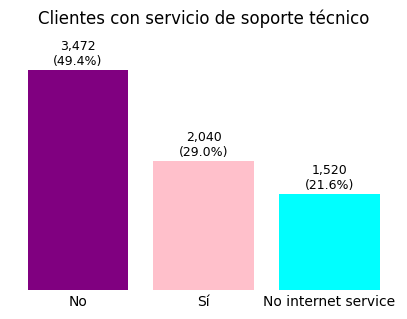

In [248]:
soporte = soporte.rename(index={0: 'No', 1: 'Sí'})

colores = ['purple', 'pink','cyan']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(soporte.index, soporte.values, color=colores)
ax.set_title('Clientes con servicio de soporte técnico', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(soporte.values, porcentaje_soporte.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

Del total de los clientes, **solo el 29% cuentan son el servicio de soporte técnico**, frente al 49.4% que no cuentan con ese servicio y el 21.6% que no cuentan con el servicio de internet.

##Servicio de TV streaming

In [249]:
tv_stream = datos_completos['TV streaming'].value_counts()
porcentaje_tv_stream = datos_completos['TV streaming'].value_counts(normalize=True) * 100
tv_stream

,count
TV streaming,
0,2809
1,2703
No internet service,1520


In [250]:
porcentaje_tv_stream

,proportion
TV streaming,
0,39.945961
1,38.438567
No internet service,21.615472


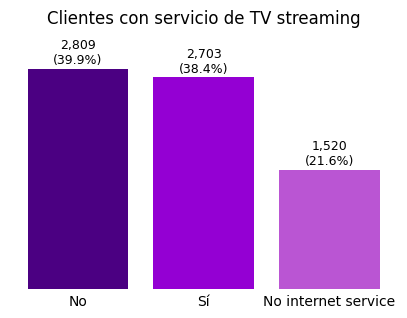

In [251]:
tv_stream = tv_stream.rename(index={0: 'No', 1: 'Sí'})

colores = ['indigo', 'darkviolet','mediumorchid']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(tv_stream.index, tv_stream.values, color=colores)
ax.set_title('Clientes con servicio de TV streaming', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(tv_stream.values, porcentaje_tv_stream.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

De los clientes que cuentan con servicio de internet, casi no hay diferencia entre los que cuentan con servicio de TV streamig y los que no cuentan con el.

##Servicio de streaming de películas

In [252]:
stream_pel = datos_completos['Streaming de películas'].value_counts()
porcentaje_stream_pel = datos_completos['Streaming de películas'].value_counts(normalize=True) * 100
stream_pel

,count
Streaming de películas,
0,2781
1,2731
No internet service,1520


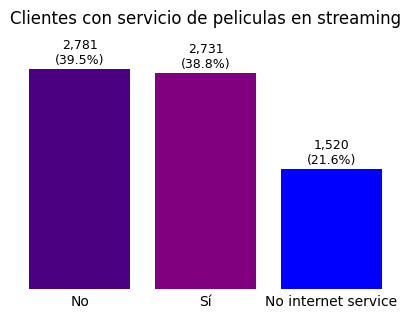

In [253]:
stream_pel = stream_pel.rename(index={0: 'No', 1: 'Sí'})

colores = ['indigo', 'purple','blue']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(stream_pel.index, stream_pel.values, color=colores)
ax.set_title('Clientes con servicio de peliculas en streaming', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(stream_pel.values, porcentaje_stream_pel.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

De igual manera , los clientes con servicio de internet utilizan el servicio de peliculas en streamign de manera similar al servicio de TV streaming.

##Tipo de contrato de cliente

In [254]:
contrato = datos_completos['Contrato'].value_counts()
porcentaje_contrato = datos_completos['Contrato'].value_counts(normalize=True) * 100
contrato

,count
Contrato,
Mensual,3875
2 Años,1685
1 Año,1472


In [255]:
porcentaje_contrato

,proportion
Contrato,
Mensual,55.105233
2 Años,23.961889
1 Año,20.932878


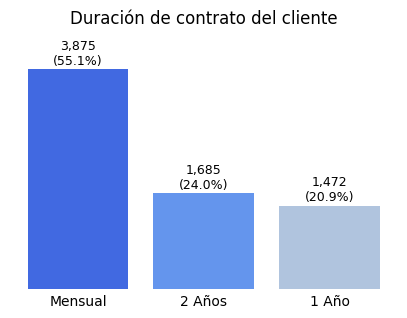

In [256]:
colores = ['royalblue', 'cornflowerblue','lightsteelblue']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(contrato.index, contrato.values, color=colores)
ax.set_title('Duración de contrato del cliente', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(contrato.values, porcentaje_contrato.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

De acuerdo a nuestros datos, la mayoría de nuestros clientes cuentan con **contrato mensual** con el **55.1%**, seguido del contrato de **2 años** con un **24%** y contrato de **un año** con el **20.9%**.

##Facturación sin papeles

In [257]:
factura = datos_completos['Facturación sin papel'].value_counts()
porcentaje_factura = datos_completos['Facturación sin papel'].value_counts(normalize=True) * 100
factura

,count
Facturación sin papel,
1,4168
0,2864


In [258]:
porcentaje_factura

,proportion
Facturación sin papel,
1,59.2719
0,40.7281


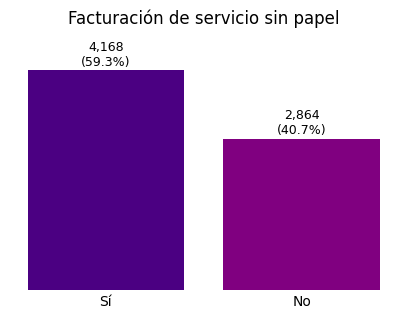

In [259]:
factura = factura.rename(index={0: 'No', 1: 'Sí'})

colores = ['indigo', 'purple']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(factura.index, factura.values, color=colores)
ax.set_title('Facturación de servicio sin papel', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(factura.values, porcentaje_factura.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

Los clientes suelen preferir más la **facturación sin papel** con un **59.3%**, en comparación con los que **no**, que son el **40.7%**.

##Metodo de pago

In [260]:
metodo_pago = datos_completos['Metodo de Pago'].value_counts()
porcentaje_metodo_pago = datos_completos['Metodo de Pago'].value_counts(normalize=True) * 100
metodo_pago

,count
Metodo de Pago,
Cheque Electrónico,2365
Cheque por Correo,1604
Transferencia Bancaria (Automatico),1542
Tarjeta de Crédito (Automatico),1521


In [261]:
porcentaje_metodo_pago

,proportion
Metodo de Pago,
Cheque Electrónico,33.631968
Cheque por Correo,22.810011
Transferencia Bancaria (Automatico),21.928328
Tarjeta de Crédito (Automatico),21.629693


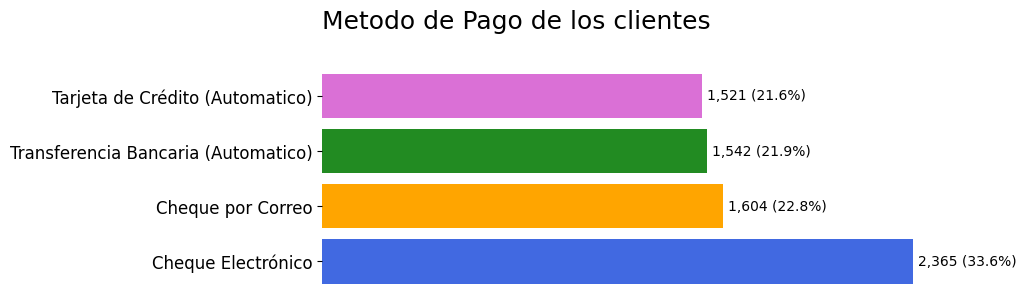

In [262]:
colores = ['royalblue','orange','forestgreen','orchid']

fig, ax = plt.subplots(figsize=(8,3))

ax.set_frame_on(False)
ax.xaxis.set_visible(False)

ax.barh(metodo_pago.index, metodo_pago.values,color=colores)
ax.set_title('Metodo de Pago de los clientes', pad=25,
             loc='left',fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Metodo de pago', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

for i, (total, pct) in enumerate(zip(metodo_pago.values, porcentaje_metodo_pago.values)):
    ax.text(
        total + 20,
        i,
        f'{total:,.0f} ({pct:.1f}%)',
        ha='left',
        va='center',
        fontsize=10
    )

plt.show()

El método de pago más utilizado es:

1. Cheque electrónico con un **33.6%**
2. Cheque por correo con un **22.8%**.
3. Transferencia Bancaria con un **21.9%**.
4. Tarjeta de crédito con un **21.6%**.

Podemos observar que los pagos automáticos son los menos utilizados.

## Cargos

###Diario

In [263]:
datos_completos['Cargo diario'].describe()

,Cargo diario
count,7032.000000
mean,2.159940
std,1.002866
min,0.608333
25%,1.186250
50%,2.345000
75%,2.995417
max,3.958333


**Cargos Diarios por Cliente:**

*   **Conteo (count):** Tenemos datos de 7032 clientes.
*   **Media (mean):** El cargo diario promedio de los clientes es de aproximadamente **2.16 unidades monetarias**.
*   **Desviación Estándar (std):** La desviación estándar es de 1.00 unidades monetarias, lo que indica que los cargos diarios varían moderadamente respecto a la media.
*   **Mínimo (min):** El cargo diario más bajo es de 0.61 unidades monetarias.
*   **25 porciento (25%):** El 25% de nuestros clientes tiene un cargo diario de 1.19 unidades monetarias o menos.
*   **Mediana (50%):** La mitad de los clientes tiene un cargo diario de 2.35 unidades monetarias o menos.
*   **75 porciento (75%):** El 75% de los clientes tiene un cargo diario de 3.00 unidades monetarias o menos.
*   **Máximo (max):** El cargo diario más alto es de 3.96 unidades monetarias.



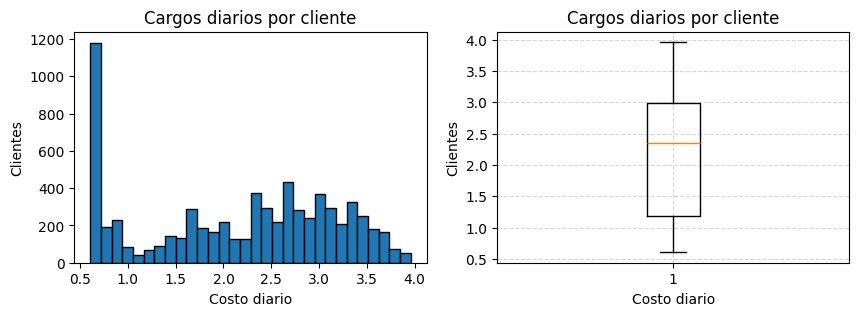

In [264]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(datos_completos['Cargo diario'], bins=30, edgecolor="black")
axs[0].set_title('Cargos diarios por cliente')
axs[0].set_xlabel('Costo diario')
axs[0].set_ylabel('Clientes')

axs[1].boxplot(datos_completos['Cargo diario'])
axs[1].set_title('Cargos diarios por cliente')
axs[1].set_xlabel('Costo diario')
axs[1].set_ylabel('Clientes')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

**Interpretación de los gráficos de Cargos Diarios:**

*   **Histograma 'Cargos diarios por cliente':** Este histograma muestra la distribución de los cargos diarios. Se puede observar que la mayoría de los clientes tienen cargos diarios entre 1 y 4 unidades monetarias. La distribución parece ser bastante uniforme en ese rango, aunque con una ligera concentración alrededor de la media y quizás un poco más hacia los valores más altos.

*   **Diagrama de Caja 'Cargos diarios por cliente':** El diagrama de caja complementa el histograma al visualizar la dispersión de los datos. La caja central abarca desde 1.19 hasta 3.00 unidades monetarias, con la mediana (línea central) en 2.35. Los 'bigotes' muestran el rango completo de los cargos diarios. No se aprecian valores atípicos significativos, lo que sugiere que todos los cargos diarios están dentro de un rango esperado y no hay valores extremadamente inusuales que distorsionen la media de manera significativa.

###Mensual

In [265]:
datos_completos['Cargo mensual'].describe()

,Cargo mensual
count,7032.000000
mean,64.798208
std,30.085974
min,18.250000
25%,35.587500
50%,70.350000
75%,89.862500
max,118.750000


**Cargos Mensuales por Cliente:**

*   **Conteo (count):** Tenemos datos de 7032 clientes.
*   **Media (mean):** El cargo mensual promedio de los clientes es de aproximadamente **64.80 unidades monetarias**.
*   **Desviación Estándar (std):** La desviación estándar es de 30.09 unidades monetarias, lo que indica una dispersión considerable en los cargos mensuales. Hay clientes con cargos muy bajos y otros con cargos muy altos.
*   **Mínimo (min):** El cargo mensual más bajo es de 18.25 unidades monetarias.
*   **25 porciento (25%):** El 25% de nuestros clientes tiene un cargo mensual de 35.59 unidades monetarias o menos.
*   **Mediana (50%):** La mitad de los clientes tiene un cargo mensual de 70.35 unidades monetarias o menos.
*   **75 porciento (75%):** El 75% de los clientes tiene un cargo mensual de 89.86 unidades monetarias o menos.
*   **Máximo (max):** El cargo mensual más alto es de 118.75 unidades monetarias.



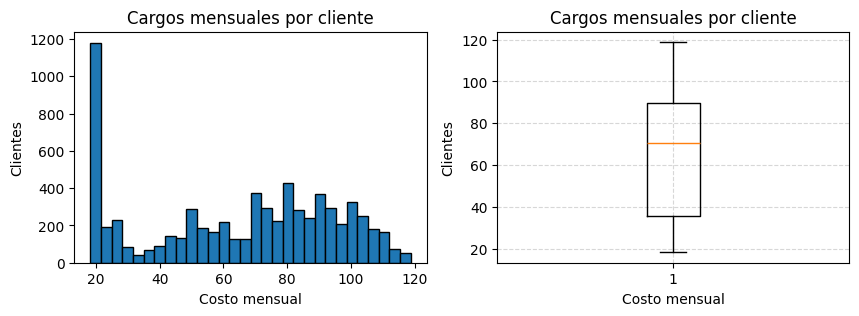

In [266]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(datos_completos['Cargo mensual'], bins=30, edgecolor="black")
axs[0].set_title('Cargos mensuales por cliente')
axs[0].set_xlabel('Costo mensual')
axs[0].set_ylabel('Clientes')

axs[1].boxplot(datos_completos['Cargo mensual'])
axs[1].set_title('Cargos mensuales por cliente')
axs[1].set_xlabel('Costo mensual')
axs[1].set_ylabel('Clientes')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

**Interpretación de los gráficos de Cargos Mensuales:**

*   **Histograma 'Cargos mensuales por cliente':** Este histograma muestra la distribución de los cargos mensuales. Se puede observar una distribución sesgada hacia la izquierda, con una mayor concentración de clientes en el rango de cargos más bajos, y luego un segundo pico o una distribución más extendida hacia los cargos más altos, especialmente entre 70 y 100 unidades monetarias. Esto podría indicar que hay un grupo significativo de clientes con planes de menor costo y otro grupo con servicios más completos o caros.

*   **Diagrama de Caja 'Cargos mensuales por cliente':** El diagrama de caja refuerza la información del histograma. La mediana (línea central) está en 70.35 unidades monetarias, lo que es superior al promedio debido al sesgo de la distribución. La caja central abarca un rango amplio de cargos. Al igual que con los cargos diarios, no se aprecian valores atípicos extremos, lo que sugiere que todos los cargos mensuales están dentro de un rango razonable para los servicios ofrecidos, pero con una clara tendencia a que muchos clientes tengan planes de costo moderado a alto.

###Total

In [267]:
datos_completos['Cargo total'].describe()

,Cargo total
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


**Cargos Totales por Cliente:**

* **Conteo (count):** Tenemos datos de 7032 clientes.
* **Media (mean):** El cargo total promedio de los clientes es de aproximadamente 2283.30 unidades monetarias.
* **Desviación Estándar (std):** La desviación estándar es de 2266.77 unidades monetarias, lo que indica una variabilidad muy alta en los cargos totales. Esto sugiere que hay una gran diferencia entre los cargos totales de los clientes, con muchos teniendo cargos bajos y otros, cargos muy altos.
* **Mínimo (min):** El cargo total más bajo es de 18.80 unidades monetarias.
* **25 porciento (25%):** El 25% de nuestros clientes tiene un cargo total de 401.45 unidades monetarias o menos.
* **Mediana (50%):** La mitad de los clientes tiene un cargo total de 1397.48 unidades monetarias o menos.
* **75 porciento (75%):** El 75% de los clientes tiene un cargo total de 3794.74 unidades monetarias o menos.
* **Máximo (max):** El cargo total más alto es de 8684.80 unidades monetarias.

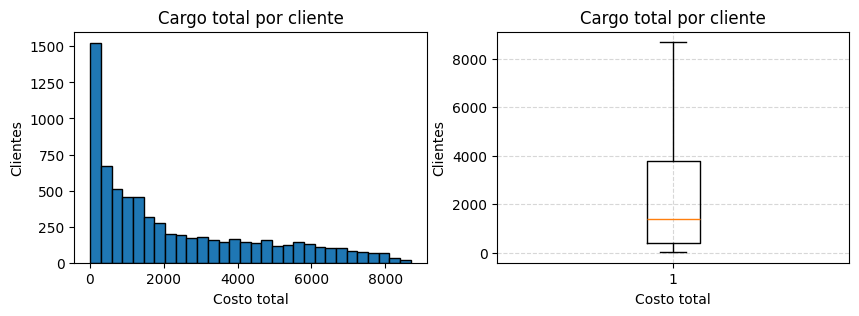

In [268]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(datos_completos['Cargo total'], bins=30, edgecolor="black")
axs[0].set_title('Cargo total por cliente')
axs[0].set_xlabel('Costo total')
axs[0].set_ylabel('Clientes')

axs[1].boxplot(datos_completos['Cargo total'])
axs[1].set_title('Cargo total por cliente')
axs[1].set_xlabel('Costo total')
axs[1].set_ylabel('Clientes')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

**Interpretación de los gráficos de Cargos Totales:**

* **Histograma 'Cargo total por cliente':** Este histograma muestra una distribución fuertemente sesgada hacia la izquierda. Esto significa que una gran cantidad de clientes tienen cargos totales bajos, y a medida que los cargos aumentan, el número de clientes disminuye. El pico principal se encuentra en los rangos de cargos más bajos, lo que es común ya que muchos clientes son nuevos o tienen contratos de menor duración.

* **Diagrama de Caja 'Cargo total por cliente':** El diagrama de caja refuerza la observación del histograma. La mediana **(1397.48)** es considerablemente más baja que la media **(2283.30)**, lo que confirma el fuerte sesgo positivo de la distribución. La caja se encuentra en los valores más bajos, y el 'bigote' superior se extiende mucho más, mostrando que hay clientes con cargos totales muy altos que tiran de la media hacia arriba. Aunque la cola es larga, no se observan valores atípicos extremos, lo que indica que, si bien algunos clientes tienen cargos totales mucho más altos, estos siguen un patrón dentro del rango general esperado.

# Recuento de evasión por variables categóricas

##Deserción en base a la antigüedad del cliente

In [269]:
antiguedad_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Antigüedad', 'Deserción']]
antiguedad_desercion_si

,Antigüedad,Deserción
2,4,1
3,13,1
4,3,1
18,45,1
19,1,1
...,...,...
7243,21,1
7246,9,1
7260,1,1
7261,4,1


In [270]:
antiguedad_desercion_si['Antigüedad'].describe()

,Antigüedad
count,1869.000000
mean,17.979133
std,19.531123
min,1.000000
25%,2.000000
50%,10.000000
75%,29.000000
max,72.000000


**Antigüedad de los clientes que desertaron:**

* **Conteo (count):** Tenemos datos de 1869 clientes.
* **Media (mean):** La antigüedad promedio de los clientes es de aproximadamente 18 meses, osea año y medio.
* **Desviación Estándar (std):** La desviación estándar es de 19.53 meses, lo que indica una variabilidad muy alta. Esto sugiere que hay una gran diferencia entre la antigüedad de los clientes que desertaron, con muchos teniendo poco tiempo de antigüedad y pocos, con mucha antigüedad.
* **Mínimo (min):** El tiempo mínimo es de 1 mes.
* **25 porciento (25%):** El 25% de los clientes desertores tenían 2 meses o menos.
* **Mediana (50%):** La mitad de los clientes tenían una antigüedad de 10 meses o menos.
* **75 porciento (75%):** El 75% de los clientes tenían una antigüedad de 29 meses o menos.
* **Máximo (max):** La antigüedad más alta que que se observó en la deserción fué de 72 meses.

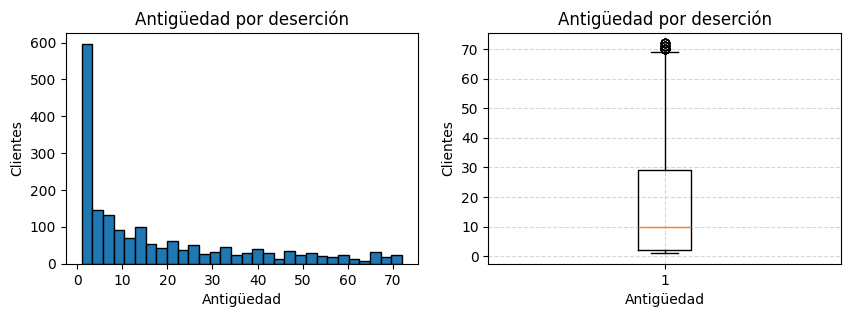

In [271]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(antiguedad_desercion_si['Antigüedad'], bins=30, edgecolor="black")
axs[0].set_title('Antigüedad por deserción')
axs[0].set_xlabel('Antigüedad')
axs[0].set_ylabel('Clientes')

axs[1].boxplot(antiguedad_desercion_si['Antigüedad'])
axs[1].set_title('Antigüedad por deserción')
axs[1].set_xlabel('Antigüedad')
axs[1].set_ylabel('Clientes')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

**El histograma de 'Antigüedad por deserción'** muestra claramente que la deserción es significativamente más alta en los primeros meses de servicio. Se observa un pico muy pronunciado en el **primer mes**, indicando que una gran cantidad de clientes desertan muy poco después de comenzar el servicio. La frecuencia de deserción disminuye drásticamente a medida que la antigüedad del cliente aumenta.

Aunque hay una disminución general, se pueden identificar patrones: después del pico inicial, la deserción sigue siendo considerablemente alta durante los primeros **6-12 meses** y luego va disminuyendo progresivamente. Esto sugiere que los clientes con menor antigüedad son los más propensos a desertar. No se observan picos significativos de deserción en los rangos de antigüedad más altos, lo que refuerza la idea de que los clientes más leales (con mayor antigüedad) tienen una menor tasa de abandono.

##Deserción en base al género del cliente

In [272]:
genero_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Genero', 'Deserción']]
genero_desercion_si

,Genero,Deserción
2,Masculino,1
3,Masculino,1
4,Femenino,1
18,Masculino,1
19,Masculino,1
...,...,...
7243,Masculino,1
7246,Masculino,1
7260,Femenino,1
7261,Femenino,1


In [273]:
genero_si = genero_desercion_si['Genero'].value_counts()
porcentaje_genero_si = genero_desercion_si['Genero'].value_counts(normalize=True) * 100
genero_si

,count
Genero,
Femenino,939
Masculino,930


In [274]:
porcentaje_genero_si

,proportion
Genero,
Femenino,50.24077
Masculino,49.75923


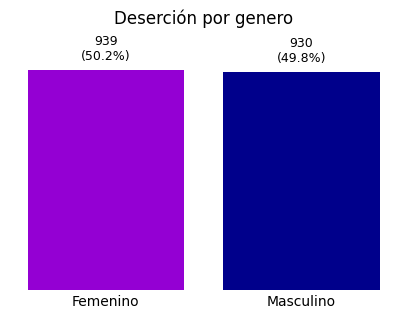

In [275]:
genero_si = genero_si.rename(index={0: 'No', 1: 'Sí'})

colores = ['darkviolet', 'darkblue']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(genero_si.index, genero_si.values, color=colores)
ax.set_title('Deserción por genero', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(genero_si.values, porcentaje_genero_si.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

Al observar nuestro gráfico, podemos llegar a la conclusión de que el **género no juega un rol importante al momento de desertar**, ya que son muy similares sus cifras.

##Deserción en base a si el cliente es adulto mayor o no

In [276]:
mayor_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Adulto Mayor', 'Deserción']]
mayor_desercion_si

,Adulto Mayor,Deserción
2,0,1
3,1,1
4,1,1
18,1,1
19,1,1
...,...,...
7243,1,1
7246,1,1
7260,0,1
7261,0,1


In [277]:
mayor_si = mayor_desercion_si['Adulto Mayor'].value_counts()
porcentaje_mayor_si = mayor_desercion_si['Adulto Mayor'].value_counts(normalize=True) * 100
mayor_si

,count
Adulto Mayor,
0,1393
1,476


In [278]:
porcentaje_mayor_si

,proportion
Adulto Mayor,
0,74.531835
1,25.468165


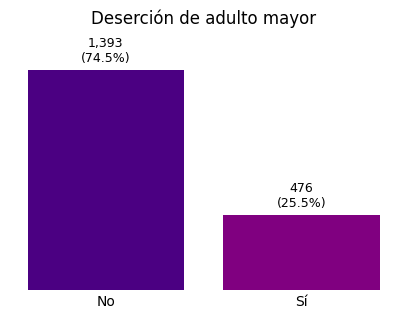

In [279]:
mayor_si = mayor_si.rename(index={0: 'No', 1: 'Sí'})

colores = ['indigo', 'purple']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(mayor_si.index, mayor_si.values, color=colores)
ax.set_title('Deserción de adulto mayor', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(mayor_si.values, porcentaje_mayor_si.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

El análisis muestra que **es menor** la cantidad de clientes **"Adultos mayores"** que desiden desertar **(25.5%)**, en cambio, el **74.5%** fueron clientes de menor edad.

##Deserción en base a si el cliente tiene pareja o no

In [280]:
pareja_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Pareja', 'Deserción']]
pareja_desercion_si

,Pareja,Deserción
2,0,1
3,1,1
4,1,1
18,0,1
19,0,1
...,...,...
7243,0,1
7246,0,1
7260,0,1
7261,0,1


In [281]:
pareja_si = pareja_desercion_si['Pareja'].value_counts()
porcentaje_pareja_si = pareja_desercion_si['Pareja'].value_counts(normalize=True) * 100
pareja_si

,count
Pareja,
0,1200
1,669


In [282]:
porcentaje_pareja_si

,proportion
Pareja,
0,64.205457
1,35.794543


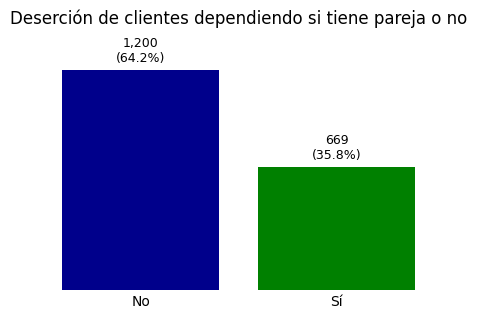

In [283]:
pareja_si = pareja_si.rename(index={0: 'No', 1: 'Sí'})

colores = ['darkblue', 'green']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(pareja_si.index, pareja_si.values, color=colores)
ax.set_title('Deserción de clientes dependiendo si tiene pareja o no', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(pareja_si.values, porcentaje_pareja_si.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

De acuredo con el análisis, se observa que la mayor parte de los **clientes que desertaron** son personas que **no cuentan con una pareja (64.2%)**, una cifra alta en comparación a las personas que cuentan **con una pareja** que serían el **35.8%**, que son aproximadamente una tercera parte.

##Deserción en base a si el cliente tiene dependientes

In [284]:
dependientes_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Dependientes', 'Deserción']]
dependientes_desercion_si

,Dependientes,Deserción
2,0,1
3,0,1
4,0,1
18,0,1
19,0,1
...,...,...
7243,0,1
7246,0,1
7260,0,1
7261,0,1


In [285]:
dependientes_si = dependientes_desercion_si['Dependientes'].value_counts()
porcentaje_dependientes_si = dependientes_desercion_si['Dependientes'].value_counts(normalize=True) * 100
dependientes_si

,count
Dependientes,
0,1543
1,326


In [286]:
porcentaje_dependientes_si

,proportion
Dependientes,
0,82.557517
1,17.442483


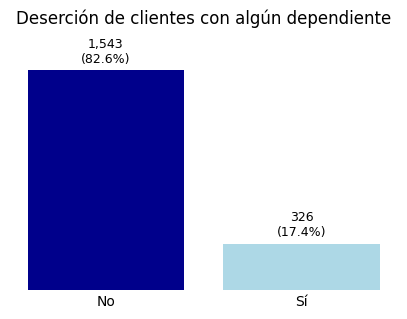

In [287]:
dependientes_si = dependientes_si.rename(index={0: 'No', 1: 'Sí'})

colores = ['darkblue', 'lightblue']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(dependientes_si.index, dependientes_si.values, color=colores)
ax.set_title('Deserción de clientes con algún dependiente', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(dependientes_si.values, porcentaje_dependientes_si.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

Se observa una gran diferencia entre la deserción de clientes con algún dependiente. El **82.6%** de los clientes que **desertaron no cuentan con algún dependiente**, solo el **17.4%** de ellos **cuentan con algún dependiente**.

##Deserción en base al servicio de internet

In [288]:
internet_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Servicio de internet', 'Deserción']]
internet_desercion_si

,Servicio de internet,Deserción
2,Fiber optic,1
3,Fiber optic,1
4,Fiber optic,1
18,DSL,1
19,DSL,1
...,...,...
7243,Fiber optic,1
7246,Fiber optic,1
7260,Fiber optic,1
7261,No,1


In [289]:
internet_si = internet_desercion_si['Servicio de internet'].value_counts()
porcentaje_internet_si = internet_desercion_si['Servicio de internet'].value_counts(normalize=True) * 100
internet_si

,count
Servicio de internet,
Fiber optic,1297
DSL,459
No,113


In [290]:
porcentaje_internet_si

,proportion
Servicio de internet,
Fiber optic,69.395399
DSL,24.558587
No,6.046014


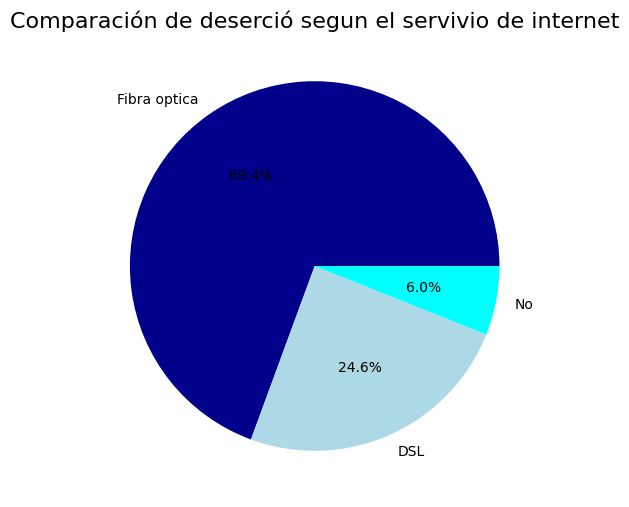

In [291]:
ax, fig = plt.subplots(figsize=(10, 6))
plt.title('Comparación de deserció segun el servivio de internet', fontsize=16)
plt.pie(internet_si, labels=('Fibra optica','DSL','No'), autopct='%1.1f%%', colors=['darkblue','lightblue','cyan'])
plt.xlabel('')
plt.ylabel('')
plt.show()

En base a la deserción de clientes, podemos observar que el **69.4%** de ellos utilizaban **internet por fibra óptica**, el **24.6%** utilizaban el **DSL** y el **6%** de ellos **no contaban con servicio de internet**.

##Deserción en base a si cuenta con protección de dispositivo

In [292]:
proteccion_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Protección de dispositivo', 'Deserción']]
proteccion_desercion_si

,Protección de dispositivo,Deserción
2,1,1
3,1,1
4,0,1
18,1,1
19,0,1
...,...,...
7243,1,1
7246,0,1
7260,0,1
7261,No internet service,1


In [293]:
proteccion_si = proteccion_desercion_si['Protección de dispositivo'].value_counts()
porcentaje_proteccion_si = proteccion_desercion_si['Protección de dispositivo'].value_counts(normalize=True) * 100
proteccion_si

,count
Protección de dispositivo,
0,1211
1,545
No internet service,113


In [294]:
porcentaje_proteccion_si

,proportion
Protección de dispositivo,
0,64.794007
1,29.159979
No internet service,6.046014


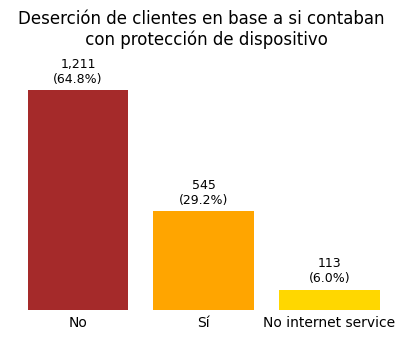

In [295]:
proteccion_si = proteccion_si.rename(index={0: 'No', 1: 'Sí'})

colores = ['brown', 'orange', 'gold']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(proteccion_si.index, proteccion_si.values, color=colores)
ax.set_title('Deserción de clientes en base a si contaban \n con protección de dispositivo', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(proteccion_si.values, porcentaje_proteccion_si.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

Así mismo podemos observar que la mayor parte de los **clientes que desertaron no contaban con protección de dispositivo (64.8%)**, solo el **29.2%** de ellos **contaban con servicio de protección** y el **6%** **no contaba con servicio de internet** así que no contaban tampoco con la protección de dispositivo.

##Deserción en base a si cuenta con soporte técnico

In [296]:
soporte_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Soporte técnico', 'Deserción']]
soporte_desercion_si

,Soporte técnico,Deserción
2,0,1
3,0,1
4,1,1
18,0,1
19,0,1
...,...,...
7243,0,1
7246,0,1
7260,0,1
7261,No internet service,1


In [297]:
soporte_si = soporte_desercion_si['Soporte técnico'].value_counts()
porcentaje_soporte_si = soporte_desercion_si['Soporte técnico'].value_counts(normalize=True) * 100
soporte_si

,count
Soporte técnico,
0,1446
1,310
No internet service,113


In [298]:
porcentaje_soporte_si

,proportion
Soporte técnico,
0,77.367576
1,16.586410
No internet service,6.046014


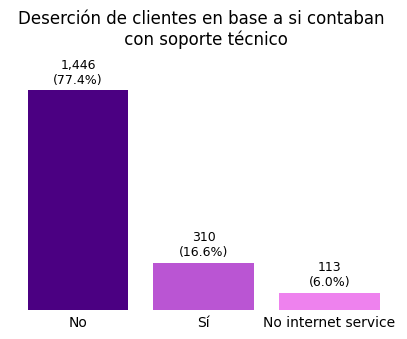

In [299]:
soporte_si = soporte_si.rename(index={0: 'No', 1: 'Sí'})

colores = ['indigo', 'mediumorchid', 'violet']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(soporte_si.index, soporte_si.values, color=colores)
ax.set_title('Deserción de clientes en base a si contaban \n con soporte técnico', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(soporte_si.values, porcentaje_soporte_si.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

Podemos observar que los clientes que desertaron en su gran mayoría **no contaban con el servicio de soporte técnico** con un **77.4%**, solo el **16.6%** de ellos **contaban con ese servicio** y el otro **6% no contaban con servicio de internet** así que tampoco contaban con el servicio de soporte.

##Deserción en base a la duración del contrato

In [300]:
contrato_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Contrato', 'Deserción']]
contrato_desercion_si

,Contrato,Deserción
2,Mensual,1
3,Mensual,1
4,Mensual,1
18,1 Año,1
19,Mensual,1
...,...,...
7243,Mensual,1
7246,Mensual,1
7260,Mensual,1
7261,Mensual,1


In [301]:
contrato_si = contrato_desercion_si['Contrato'].value_counts()
porcentaje_contrato_si = contrato_desercion_si['Contrato'].value_counts(normalize=True) * 100
contrato_si

,count
Contrato,
Mensual,1655
1 Año,166
2 Años,48


In [302]:
porcentaje_contrato_si

,proportion
Contrato,
Mensual,88.550027
1 Año,8.881755
2 Años,2.568218


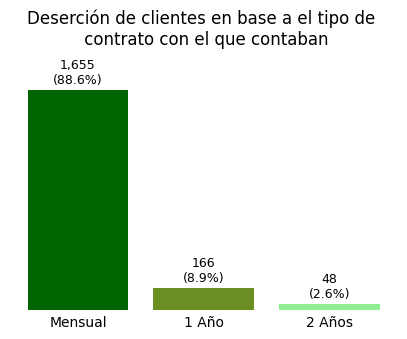

In [303]:
colores = ['darkgreen', 'olivedrab', 'lightgreen']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(contrato_si.index, contrato_si.values, color=colores)
ax.set_title('Deserción de clientes en base a el tipo de \n contrato con el que contaban', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(contrato_si.values, porcentaje_contrato_si.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

La deserción se observa mayormente en clientes con **contrato mensual (88.6%)**, que es un contraste muy grande con los clientes que desertaron y tenías un **contrato de 1 año (8.9%)** y unos pocos de ellos tenían un **contrato por 2 años (2.6%)**.

##Deserción en base a si la facturación es sin papel

In [304]:
facturacion_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Facturación sin papel', 'Deserción']]
facturacion_desercion_si

,Facturación sin papel,Deserción
2,1,1
3,1,1
4,1,1
18,0,1
19,1,1
...,...,...
7243,1,1
7246,1,1
7260,1,1
7261,0,1


In [305]:
facturacion_si = facturacion_desercion_si['Facturación sin papel'].value_counts()
porcentaje_facturacion_si = facturacion_desercion_si['Facturación sin papel'].value_counts(normalize=True) * 100
facturacion_si

,count
Facturación sin papel,
1,1400
0,469


In [306]:
porcentaje_facturacion_si

,proportion
Facturación sin papel,
1,74.906367
0,25.093633


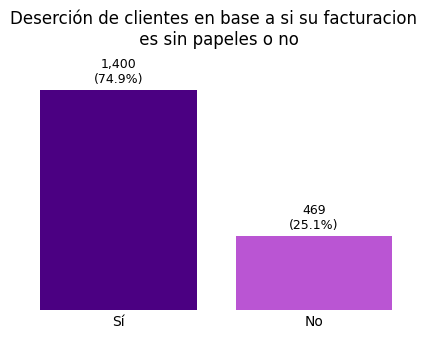

In [307]:
facturacion_si = facturacion_si.rename(index={0: 'No', 1: 'Sí'})

colores = ['indigo', 'mediumorchid', 'violet']

fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(facturacion_si.index, facturacion_si.values, color=colores)
ax.set_title('Deserción de clientes en base a si su facturacion \n es sin papeles o no', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(facturacion_si.values, porcentaje_facturacion_si.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

La mayor parte de los clientes que desertaron contaban con el tipo de **facturación sin papel (74.9%)**, la deserción de los que tenían la **facturación con papel** es del **25.1%**.

##Deserción en base al método de pago

In [308]:
pago_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Metodo de Pago', 'Deserción']]
pago_desercion_si

,Metodo de Pago,Deserción
2,Cheque Electrónico,1
3,Cheque Electrónico,1
4,Cheque por Correo,1
18,Tarjeta de Crédito (Automatico),1
19,Cheque Electrónico,1
...,...,...
7243,Transferencia Bancaria (Automatico),1
7246,Cheque Electrónico,1
7260,Cheque por Correo,1
7261,Transferencia Bancaria (Automatico),1


In [309]:
pago_si = pago_desercion_si['Metodo de Pago'].value_counts()
porcentaje_pago_si = pago_desercion_si['Metodo de Pago'].value_counts(normalize=True) * 100
pago_si

,count
Metodo de Pago,
Cheque Electrónico,1071
Cheque por Correo,308
Transferencia Bancaria (Automatico),258
Tarjeta de Crédito (Automatico),232


In [310]:
porcentaje_pago_si

,proportion
Metodo de Pago,
Cheque Electrónico,57.303371
Cheque por Correo,16.479401
Transferencia Bancaria (Automatico),13.804173
Tarjeta de Crédito (Automatico),12.413055


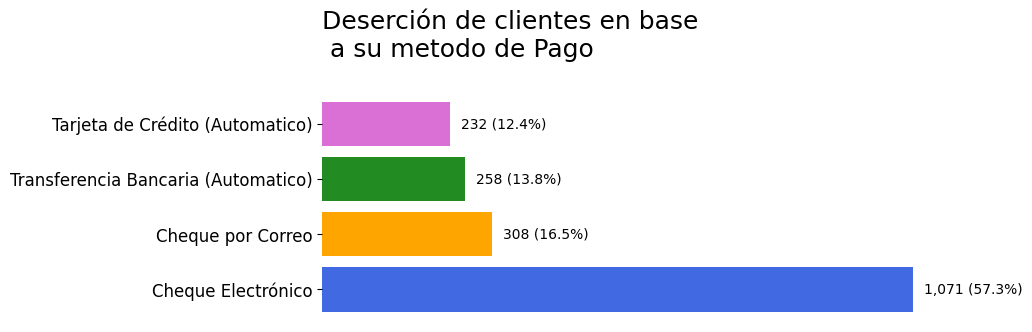

In [311]:
colores = ['royalblue','orange','forestgreen','orchid']

fig, ax = plt.subplots(figsize=(8,3))

ax.set_frame_on(False)
ax.xaxis.set_visible(False)

ax.barh(pago_si.index, pago_si.values,color=colores)
ax.set_title('Deserción de clientes en base \n a su metodo de Pago', pad=25,
             loc='left',fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Metodo de pago', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

for i, (total, pct) in enumerate(zip(pago_si.values, porcentaje_pago_si.values)):
    ax.text(
        total + 20,
        i,
        f'{total:,.0f} ({pct:.1f}%)',
        ha='left',
        va='center',
        fontsize=10
    )

plt.show()

Podemos observar que de los clientes que desertaron, la gran mayoría realizaban su pago a travéz de **cheque electrónico (57.3%)**, lo cual es mayor al la mitad de ellos, seguido por el **cheque por correo (16.5%)**, y los menores fueron los pagos automáticos, como **transferencia bancaria (13.8%)** y **tarjeta de crédito (12.4%)**.

#Conteo de evasión por variables numéricas

##Cargo diario

In [312]:
cargo_diario_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Cargo diario', 'Deserción']]
cargo_diario_desercion_si

,Cargo diario,Deserción
2,2.463333,1
3,3.266667,1
4,2.796667,1
18,2.090000,1
19,0.836667,1
...,...,...
7243,3.226667,1
7246,2.795000,1
7260,2.338333,1
7261,0.698333,1


In [313]:
cargo_diario_desercion_si['Cargo diario'].describe()

,Cargo diario
count,1869.000000
mean,2.481378
std,0.822202
min,0.628333
25%,1.871667
50%,2.655000
75%,3.140000
max,3.945000


**Cargos Diarios por Cliente que desertaron:**

*   **Conteo (count):** Tenemos datos de 1869 clientes.
*   **Media (mean):** El cargo diario promedio de los clientes es de aproximadamente **2.48 unidades monetarias**.
*   **Desviación Estándar (std):** La desviación estándar es de 0.82 unidades monetarias, lo que indica que los cargos diarios varían moderadamente respecto a la media.
*   **Mínimo (min):** El cargo diario más bajo es de 0.63 unidades monetarias.
*   **25 porciento (25%):** El 25% de nuestros clientes tiene un cargo diario de 1.87 unidades monetarias o menos.
*   **Mediana (50%):** La mitad de los clientes tiene un cargo diario de 2.66 unidades monetarias o menos.
*   **75 porciento (75%):** El 75% de los clientes tiene un cargo diario de 3.14 unidades monetarias o menos.
*   **Máximo (max):** El cargo diario más alto es de 3.95 unidades monetarias.



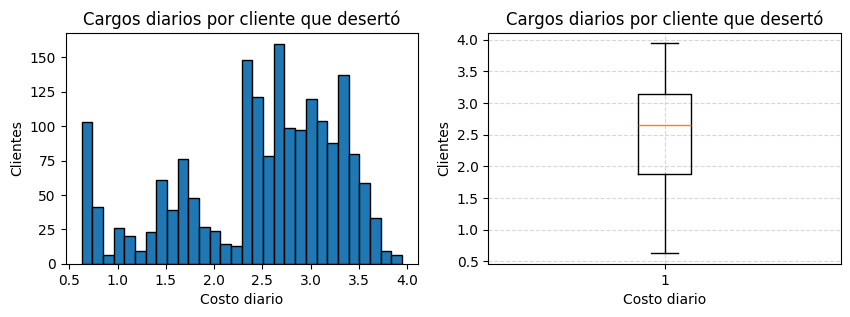

In [314]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(cargo_diario_desercion_si['Cargo diario'], bins=30, edgecolor="black")
axs[0].set_title('Cargos diarios por cliente que desertó')
axs[0].set_xlabel('Costo diario')
axs[0].set_ylabel('Clientes')

axs[1].boxplot(cargo_diario_desercion_si['Cargo diario'])
axs[1].set_title('Cargos diarios por cliente que desertó')
axs[1].set_xlabel('Costo diario')
axs[1].set_ylabel('Clientes')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

**Interpretación de los gráficos de Cargos Diarios de los clientes que desertaron:**

*   **Histograma 'Cargos diarios por cliente':** Este histograma muestra la distribución de los cargos diarios de los clientes que desertaron. Se puede observar que la mayoría de los clientes tienen cargos diarios entre 2.3 y 3.5 unidades monetarias. La distribución parece ser bastante uniforme en ese rango, aunque con una ligera concentración alrededor de la media y quizás un poco más hacia los valores más altos.

*   **Diagrama de Caja 'Cargos diarios por cliente':** El diagrama de caja complementa el histograma al visualizar la dispersión de los datos. La caja central abarca desde 1.87 hasta 3.14 unidades monetarias, con la mediana (línea central) en 2.66. Los 'bigotes' muestran el rango completo de los cargos diarios. No se aprecian valores atípicos significativos, lo que sugiere que todos los cargos diarios están dentro de un rango esperado y no hay valores extremadamente inusuales que distorsionen la media de manera significativa.

##Cargo Mensual

In [315]:
cargo_mensual_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Cargo mensual', 'Deserción']]
cargo_mensual_desercion_si

,Cargo mensual,Deserción
2,73.90,1
3,98.00,1
4,83.90,1
18,62.70,1
19,25.10,1
...,...,...
7243,96.80,1
7246,83.85,1
7260,70.15,1
7261,20.95,1


In [316]:
cargo_mensual_desercion_si['Cargo mensual'].describe()

,Cargo mensual
count,1869.000000
mean,74.441332
std,24.666053
min,18.850000
25%,56.150000
50%,79.650000
75%,94.200000
max,118.350000


**Cargos Mensuales por Cliente en base a su deserción:**

*   **Conteo (count):** Tenemos datos de 1869 clientes.
*   **Media (mean):** El cargo mensual promedio de los clientes era de de aproximadamente **74.44 unidades monetarias**.
*   **Desviación Estándar (std):** La desviación estándar es de 24.67 unidades monetarias, lo que indica una dispersión considerable en los cargos mensuales.
*   **Mínimo (min):** El cargo mensual más bajo era de 18.85 unidades monetarias.
*   **25 porciento (25%):** El 25% de nuestros clientes tenían un cargo mensual de 56.15 unidades monetarias o menos.
*   **Mediana (50%):** La mitad de los clientes tenían un cargo mensual de 79.65 unidades monetarias o menos.
*   **75 porciento (75%):** El 75% de los clientes tenían un cargo mensual de 94.20 unidades monetarias o menos.
*   **Máximo (max):** El cargo mensual más alto era de 118.35 unidades monetarias.

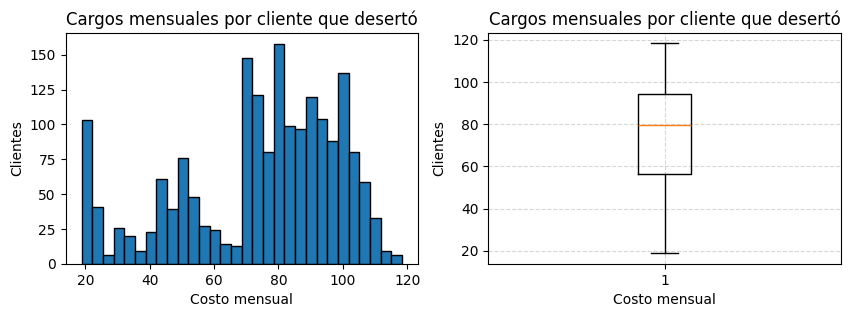

In [317]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(cargo_mensual_desercion_si['Cargo mensual'], bins=30, edgecolor="black")
axs[0].set_title('Cargos mensuales por cliente que desertó')
axs[0].set_xlabel('Costo mensual')
axs[0].set_ylabel('Clientes')

axs[1].boxplot(cargo_mensual_desercion_si['Cargo mensual'])
axs[1].set_title('Cargos mensuales por cliente que desertó')
axs[1].set_xlabel('Costo mensual')
axs[1].set_ylabel('Clientes')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

**Interpretación de los gráficos de Cargos Mensuales de los clientes que desertaron:**

*   **Histograma 'Cargos mensuales por cliente':** Este histograma muestra la distribución de los cargos mensuales de los clientes que desertaron. Se puede observar una distribución sesgada hacia la derecha, con una mayor concentración de clientes en el rango de cargos de la media, y luego un segundo pico o una distribución más extendida hacia los cargos más altos, especialmente entre 70 y 100 unidades monetarias. Esto podría indicar que hay un grupo significativo de clientes con servicios más completos o caros.

*   **Diagrama de Caja 'Cargos mensuales por cliente':** El diagrama de caja refuerza la información del histograma. La mediana (línea central) está en 79.65 unidades monetarias, lo que es superior por poco al promedio. La caja central abarca un rango entre 56.15 y 94.20. Al igual que con los cargos diarios, no se aprecian valores atípicos extremos, lo que sugiere que todos los cargos mensuales están dentro de un rango razonable para los servicios ofrecidos, pero con una clara tendencia a que muchos clientes tengan planes de costo alto.

##Cargo total

In [318]:
cargo_total_desercion_si = datos_completos[datos_completos['Deserción'] == 1][['Cargo total', 'Deserción']]
cargo_total_desercion_si

,Cargo total,Deserción
2,280.85,1
3,1237.85,1
4,267.40,1
18,2791.50,1
19,25.10,1
...,...,...
7243,2030.30,1
7246,790.15,1
7260,70.15,1
7261,85.50,1


In [319]:
cargo_total_desercion_si['Cargo total'].describe()

,Cargo total
count,1869.000000
mean,1531.796094
std,1890.822994
min,18.850000
25%,134.500000
50%,703.550000
75%,2331.300000
max,8684.800000


**Cargos Totales por Cliente que desertaron:**

* **Conteo (count):** Tenemos datos de 1869 clientes.
* **Media (mean):** El cargo total promedio de los clientes era de aproximadamente 1531.80 unidades monetarias.
* **Desviación Estándar (std):** La desviación estándar era de 1890.82 unidades monetarias, lo que indica una variabilidad muy alta en los cargos totales. Esto sugiere que hay una gran diferencia entre los cargos totales de los clientes, con muchos teniendo cargos bajos.
* **Mínimo (min):** El cargo total más bajo era de 18.85 unidades monetarias.
* **25 porciento (25%):** El 25% de nuestros clientes tenían un cargo total de 134.50 unidades monetarias o menos.
* **Mediana (50%):** La mitad de los clientes tenian un cargo total de 703.55 unidades monetarias o menos.
* **75 porciento (75%):** El 75% de los clientes tenian un cargo total de 2331.30 unidades monetarias o menos.
* **Máximo (max):** El cargo total más alto era de 8684.80 unidades monetarias.

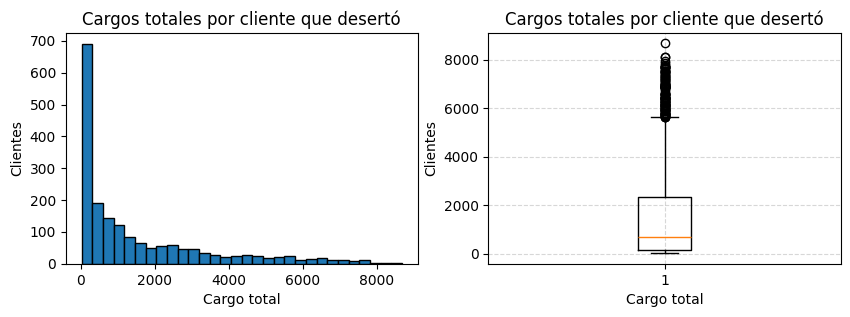

In [320]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(cargo_total_desercion_si['Cargo total'], bins=30, edgecolor="black")
axs[0].set_title('Cargos totales por cliente que desertó')
axs[0].set_xlabel('Cargo total')
axs[0].set_ylabel('Clientes')

axs[1].boxplot(cargo_total_desercion_si['Cargo total'])
axs[1].set_title('Cargos totales por cliente que desertó')
axs[1].set_xlabel('Cargo total')
axs[1].set_ylabel('Clientes')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

**Interpretación de los gráficos de Cargos Totales de los clientes que desertaron:**

* **Histograma 'Cargo total por cliente segun deserción':** Este histograma muestra una distribución fuertemente sesgada hacia la izquierda. Esto significa que una gran cantidad de clientes que desertaron tenían cargos totales bajos, y a medida que los cargos aumentan, el número de clientes disminuye. El pico principal se encuentra en los rangos de cargos más bajos, lo que es común ya que muchos clientes que desertan son nuevos o tenian contratos de menor duración.

* **Diagrama de Caja 'Cargo total por cliente según deserción':** El diagrama de caja refuerza la observación del histograma. La mediana **(703.55)** es considerablemente más baja que la media **(1531.80)**, lo que confirma el fuerte sesgo positivo de la distribución. La caja se encuentra en los valores más bajos, y el 'bigote' superior se extiende mucho más, mostrando que hay clientes con cargos totales muy altos que tiran de la media hacia arriba. Aunque la cola es larga y se observan valores atípicos extremos, lo que indica que son pocos los clientes que tenian cargos totales mucho más altos y desidieron desertar.

#Análisis de correlación entre variables

In [321]:
datos_completos.head(2)

,ID de cliente,Deserción,Genero,Adulto Mayor,Pareja,Dependientes,Antigüedad,Servicio telefónico,Lineas multiples,Servicio de internet,...,Protección de dispositivo,Soporte técnico,TV streaming,Streaming de películas,Contrato,Facturación sin papel,Metodo de Pago,Cargo diario,Cargo mensual,Cargo total
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,1 Año,1,Cheque por Correo,2.186667,65.6,593.3
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Cheque por Correo,1.996667,59.9,542.4


In [322]:
correlacion_datos = datos_completos[['Deserción','Adulto Mayor','Pareja','Dependientes','Antigüedad','Servicio telefónico',
                                     'Facturación sin papel','Cargo mensual','Cargo total']]
correlacion_datos

,Deserción,Adulto Mayor,Pareja,Dependientes,Antigüedad,Servicio telefónico,Facturación sin papel,Cargo mensual,Cargo total
0,0,0,1,1,9,1,1,65.60,593.30
1,0,0,0,0,9,1,0,59.90,542.40
2,1,0,0,0,4,1,1,73.90,280.85
3,1,1,1,0,13,1,1,98.00,1237.85
4,1,1,1,0,3,1,1,83.90,267.40
...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,13,1,0,55.15,742.90
7263,1,0,1,0,22,1,1,85.10,1873.70
7264,0,0,0,0,2,1,1,50.30,92.75
7265,0,0,1,1,67,1,0,67.85,4627.65


In [323]:
corr = correlacion_datos.corr()
corr

,Deserción,Adulto Mayor,Pareja,Dependientes,Antigüedad,Servicio telefónico,Facturación sin papel,Cargo mensual,Cargo total
Deserción,1.000000,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484
Adulto Mayor,0.150541,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411
Pareja,-0.149982,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072
Dependientes,-0.163128,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653
Antigüedad,-0.354049,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880
Servicio telefónico,0.011691,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008
Facturación sin papel,0.191454,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830
Cargo mensual,0.192858,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065
Cargo total,-0.199484,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000


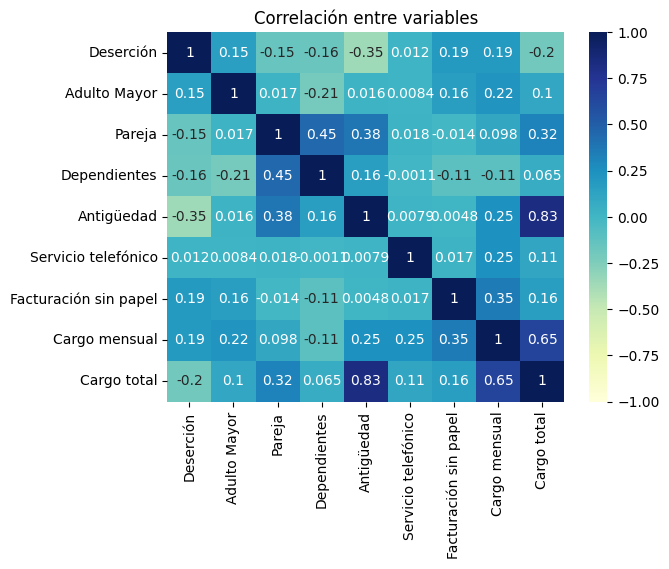

In [324]:
sns.heatmap(corr, annot=True, cmap='YlGnBu', vmax=1, vmin=-1)
plt.title('Correlación entre variables')
plt.show()

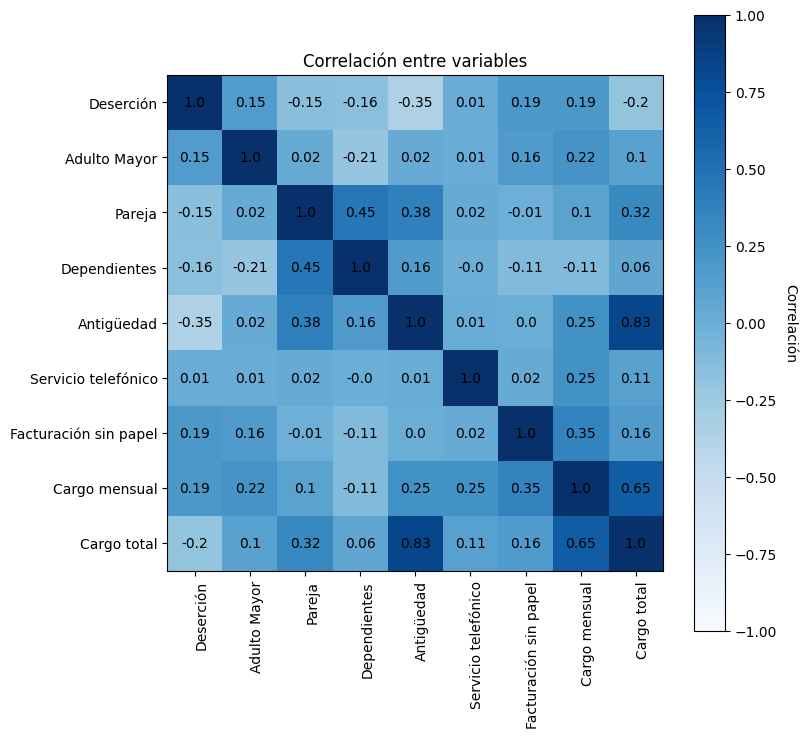

In [325]:
from matplotlib import cbook
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(corr, vmax=1, vmin=-1,cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlación', rotation=-90, va='bottom')

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))

ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.index)

plt.setp(ax.get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor')

for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, round(corr.iloc[i,j],2),
                       ha='center', va='center', color='black')

ax.set_title('Correlación entre variables')
plt.show()

#Conclusiones e Insights

Encontramos información relevante en base al análisis de el total de clientes y de los clientes que desertaron:

* La cifra de **deserción en base al total de clientes es del 26.6%**, lo cual es una cifra muy alta ya que es mas de una cuarta parte de los clientes.

* La deserción es mayor en los primero meses del cliente, según el análisis de la deserción **en base a la antigüedad podemos observar que los clientes en su mayoría desertan en el primer mes**, y los siguientes 6 a 12 meses también son clave en la desición de desertar, en cambio los clientes con mayor antigüedad desertan menos.

* El género no juega un rol importante en si el cliente deserta o no.

* A pesar que según el análisi los **clientes de menor edad desertan más que los adultos mayores**, esto se debe a que la cantidad de clientes de edad avanzada son menor que los clientes más jovenes, al revisar la deserción solo de adultos mayores podemos ver que en general es alta.

* Se puede observar que **los clientes sin pareja y sin personas dependientes de ellos por algún motivo tienden más a la deserción** que los que sin tienen pareja o dependientes, lo cual indica que los clientes con vinculos familiares muestran mayor estabilidad y menor tendencia a la deserción.

* De los clientes que desertaron solo el **6%** no contaban con servicio de internet.

* La mayoría de los clientes que desertaron contaban con internet mediante fibra óptica.

* Casi el **65% de los clientes que desertaron no contaban con servico de protección de dispositivo**.

* El **77% de los clientes que desertaron no contaban con el servicio de soporte técnico**.

* El **88.6% de los clientes que desertaron contaban con contrato mensual**.

* Los clientes que **desertaron** en su mayoría contaban con **facturación sin papel (74.9%)**.

* Más del **50% **de los clientes que desertaron utilizaban el **pago mediente el Cheque Electrónico**.

De acuerdo a las variables numéricas, podemos llegar a la conclusión que:

* Los cargos diarios y mensuales se inclinan más a los valores altos, en cambio los valores totales se inclinan más a los valores bajos. Esto se debe también a que los clientes que desertan en su mayoría tienen contratos por menor tiempo por ese motivo los cargos totales son bajos.




**Correlación de la deserción con otros valores:**

* **Antigüedad (-0.35):** Existe una correlación negativa moderada. Esto sugiere que los clientes con mayor antigüedad tienen una menor probabilidad de deserción. A medida que la antigüedad aumenta, la deserción tiende a disminuir.
* **Cargo total (-0.20):** Presenta una correlación negativa débil. Aunque no es muy fuerte, indica que los clientes con un cargo total más alto tienen una ligera tendencia a no desertar.
* **Pareja (-0.15):** Muestra una correlación negativa débil. Los clientes que tienen pareja tienen una ligera tendencia a desertar menos.
* **Dependientes (-0.16):** También presenta una correlación negativa débil. Similar a tener pareja, los clientes con dependientes tienen una ligera tendencia a desertar menos.
* **Adulto Mayor (0.15):** Se observa una correlación positiva débil. Los clientes de la tercera edad tienen una ligera tendencia a desertar más.
* **Facturación sin papel (0.19):** Hay una correlación positiva débil. Los clientes que optan por la facturación sin papel tienen una ligera tendencia a desertar más.
* **Cargo mensual (0.19):** Muestra una correlación positiva débil. Los clientes con cargos mensuales más altos tienen una ligera tendencia a desertar más.
* **Servicio telefónico (0.01):** La correlación es casi nula, lo que indica que no hay una relación lineal significativa entre tener servicio telefónico y la deserción.

#Recomendaciones

**Implicación clave para la retención:**

La alta tasa de deserción en los primeros meses resalta la necesidad crítica de implementar estrategias de "onboarding" y retención agresivas y efectivas durante el período inicial del cliente. Enfocarse en la satisfacción y el compromiso de los clientes nuevos podría reducir significativamente la tasa general de deserción.

Es necesario crear estrategias más atractivas para los clientes en las etapas iniciales, así como promocionar más servicios de seguridad y soporte, ya que nuestro análisis indica que en su mayoría los clientes que desertan no contaban con estos servicios y podrían ayudar a que el cliente esté más satisfecho con la compañía.

Hay que realizar seguimiento de clientes en etapas tempranas, de igual manera a los clientes con internet de fibra óptica ya que fueron los más propensos a desertar.

La facturación sin papeles, los contratos mensuales,los cargos mensuales más altos y los pagos no automatizados fueron más altos en clientes que desidieron desertar, así que la recomendación podría hacer crear promociones estratégicas para que los clientes elijan contratos de mayor duración con pagos automatizados.